<a href="https://colab.research.google.com/github/Seriphap/Exercise_NaiveBayes_-ComparePerformancewithLogisticRegression-/blob/main/HW_3_1_NaiveBayes%26LogisticRegression_6710422002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Learn how to NaiveBayes work



In [ ]:
# @title
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Preparing the data for Naive Bayes
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MyData/emails.csv')
#print(df.info())
#display(df)

# Step 2: Identify Y(Class/Label), X(features)
from sklearn.feature_extraction.text import CountVectorizer

# Fit and transform the 'text' column into a document-term matrix (Std Matrix to Sparse Matrix "keep only not 0 value")
vectorizer = CountVectorizer()# Create an instance of CountVectorizer
X = vectorizer.fit_transform(df['text'])# Features X
#print("Transformed X to Sparse Matrix):\n",X)
y = df['spam']#Label Y
#print("\nLabels (Spam/Ham):",y)

# Step 3: Use Scikit-learn for NaiveBayes train and test model
# Split the data into train and test sets (80% train, 20% test)
# Capture the train and test indices
indices = np.arange(len(df))
X_train_NB, X_test_NB, y_train_NB, y_test_NB, train_indices_NB, test_indices_NB = train_test_split(X, y, indices,test_size=0.2, random_state=42)

# Create the Naive Bayes classifier
NB_classifier = MultinomialNB()
# Train the model on the training data
NB_classifier.fit(X_train_NB, y_train_NB)  # train 80%

# Predict on the training data
y_predict_train_NB = NB_classifier.predict(X_train_NB)
# Print the classification report for the training set
print("Classification Report for Training Set:")
print('Predicted train values:', y_predict_train_NB)
print(classification_report(y_train_NB, y_predict_train_NB))
accuracy_train_NB = accuracy_score(y_train_NB, y_predict_train_NB)
print(f'Accuracy: {accuracy_train_NB * 100:.2f}%')
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train_NB, y_predict_train_NB))

# Predict on the test data
y_predict_test_NB = NB_classifier.predict(X_test_NB) # test 20%
# Print the classification report from test dataset 20%
# Display the predictions from test 20%
print("\nClassification Report for Testing Set:")
print('Predicted test values:', y_predict_test_NB)
print(classification_report(y_test_NB, y_predict_test_NB))
accuracy_test_NB = accuracy_score(y_test_NB, y_predict_test_NB)
print(f'Accuracy: {accuracy_test_NB * 100:.2f}%')
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_NB, y_predict_test_NB))

# Add predictions to the original DataFrame (for the training set)
df_train = df.iloc[train_indices_NB].copy()  # Get the training subset from the original DataFrame
df_train['predicted_spam'] = y_predict_train_NB  # Add the predictions as a new column

# Add predictions to the original DataFrame (for the test set)
df_test = df.iloc[test_indices_NB].copy()  # Get the test subset from the original DataFrame
df_test['predicted_spam'] = y_predict_test_NB  # Add the predictions as a new column

# Concatenate both train and test DataFrames
df_all = pd.concat([df_train, df_test])

# Display the DataFrame with predictions for both train and test sets
#print("\nAll Data with Predictions:")
#display(df_all)

# Export the combined DataFrame to a CSV file
#df_all.to_csv('data_with_predictions.csv', index=False)  # Save the file without the index column
#print("\nData has been exported to 'data_with_predictions.csv'")


Classification Report for Training Set:
Predicted train values: [0 0 0 ... 0 0 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3504
           1       0.99      1.00      0.99      1078

    accuracy                           1.00      4582
   macro avg       1.00      1.00      1.00      4582
weighted avg       1.00      1.00      1.00      4582

Accuracy: 99.76%
Confusion Matrix:
[[3494   10]
 [   1 1077]]

Classification Report for Testing Set:
Predicted test values: [0 0 0 ... 1 0 0]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       856
           1       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

Accuracy: 99.13%
Confusion Matrix:
[[848   8]
 [  2 288]]


# 2. Implement Logistic Regression

In [ ]:
# @title
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MyData/emails.csv')

# Display the first few rows of the dataset
# print(df.head())

# Assuming the dataset has two columns: 'text' (the email content) and 'spam' (the label: 0 for ham, 1 for spam)
X = df['text']  # Email text data
y = df['spam']  # Target variable (spam or not)

# Step 1: Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)  # Converts the text to a sparse matrix
# Step 2: Split the data into training and testing sets
indices = np.arange(len(y))
X_train_LG, X_test_LG, y_train_LG, y_test_LG, train_indices_LG, test_indices_LG = train_test_split(X, y, indices, test_size=0.2, random_state=42)

# Step 3: Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase iterations if necessary

# Step 4: Train the model
model.fit(X_train_LG, y_train_LG)

# Step 5: Make predictions on the test set
y_predict_train_LG = model.predict(X_train_LG)
print("Classification Report for Training Set:")
print('Predicted train values:', y_predict_train_LG)

# Step 6: Evaluate the model's performance
# Classification Report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_train_LG, y_predict_train_LG))

accuracy_train_LG = accuracy_score(y_train_LG, y_predict_train_LG)
print(f'Accuracy: {accuracy_train_LG * 100:.2f}%')

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train_LG, y_predict_train_LG))


# Step 7: Make predictions on the test set
y_predict_test_LG = model.predict(X_test_LG)
print("\nClassification Report for test dataset:")
print('Predicted test values:', y_predict_test_LG)

# Step 8: Evaluate the model's performance
# Classification Report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test_LG, y_predict_test_LG))

accuracy_test_LG = accuracy_score(y_test_LG, y_predict_test_LG)
print(f'Accuracy: {accuracy_test_LG * 100:.2f}%')

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_LG, y_predict_test_LG))



Classification Report for Training Set:
Predicted train values: [0 0 0 ... 0 0 1]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3504
           1       1.00      1.00      1.00      1078

    accuracy                           1.00      4582
   macro avg       1.00      1.00      1.00      4582
weighted avg       1.00      1.00      1.00      4582

Accuracy: 100.00%
Confusion Matrix:
[[3504    0]
 [   0 1078]]

Classification Report for test dataset:
Predicted test values: [0 0 0 ... 1 0 0]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       856
           1       0.99      0.97      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146

Accuracy: 98.87%
Confusion Matrix:
[[853   3]
 [ 10 280]]


**Comparison**

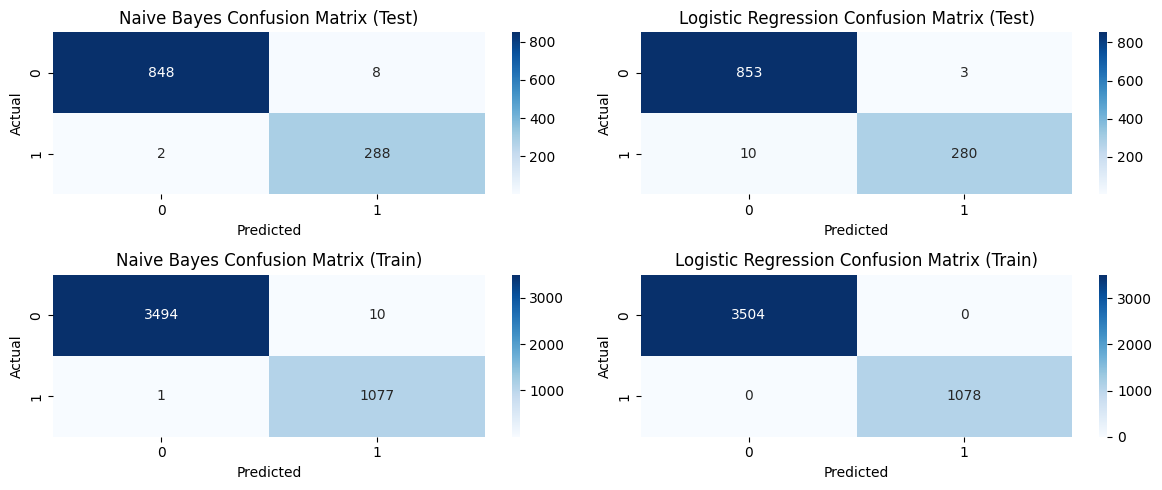

In [ ]:
# @title
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Calculate confusion matrices
cm_test_NB = confusion_matrix(y_test_NB, y_predict_test_NB)
cm_test_LG = confusion_matrix(y_test_LG, y_predict_test_LG)
cm_train_NB = confusion_matrix(y_train_NB, y_predict_train_NB)
cm_train_LG = confusion_matrix(y_train_LG, y_predict_train_LG)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

# Plot confusion matrix for Naive Bayes (Test)
sns.heatmap(cm_test_NB, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Naive Bayes Confusion Matrix (Test)')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# Plot confusion matrix for Logistic Regression (Test)
sns.heatmap(cm_test_LG, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Logistic Regression Confusion Matrix (Test)')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# Plot confusion matrix for Naive Bayes (Train)
sns.heatmap(cm_train_NB, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Naive Bayes Confusion Matrix (Train)')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# Plot confusion matrix for Logistic Regression (Train)
sns.heatmap(cm_train_LG, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Logistic Regression Confusion Matrix (Train)')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()